First 5 Rows:
  month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2  ...         0   
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0  ...         0   

   monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0         0         0         0         1         0         0         0   
1         0         0         0         0         0         0         1   
2         0         0         0         0         0         0         1   
3         0         0         0         1         0         0         0   
4         0         0         0         1         0         0         0   

   monthsep  size_category  
0         0          small  
1         0   

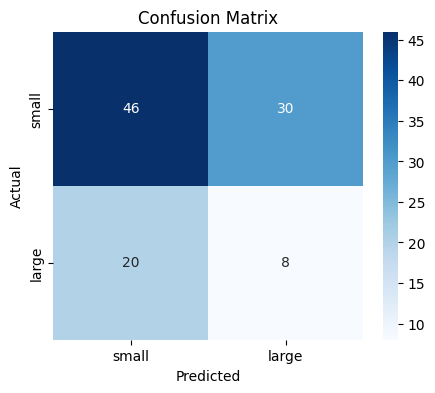


Best Parameters from Grid Search: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}

(Tuned) Accuracy: 64.42%
              precision    recall  f1-score   support

       small       0.72      0.84      0.78        76
       large       0.20      0.11      0.14        28

    accuracy                           0.64       104
   macro avg       0.46      0.47      0.46       104
weighted avg       0.58      0.64      0.60       104



In [1]:
# FOREST FIRES - SVM CLASSIFICATION PIPELINE

# 1. ALL IMPORTS
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

###############################################################
# 2. LOAD DATA
# Update the file path if needed (Windows path, double backslash or r prefix)
file_path = r'C:\Users\6063454\Desktop\VPW\Top Mentor Projects\12. Support Vector Machines 2\12. Support Vector Machines\forestfires.csv'
data = pd.read_csv(file_path)

###############################################################
# 3. INITIAL DATA INSPECTION
print("First 5 Rows:")
print(data.head())
print("\nInfo:")
print(data.info())
print("\nMissing values per column:\n", data.isnull().sum())
print("\nValue Counts of Target (size_category):")
print(data['size_category'].value_counts(dropna=False))

###############################################################
# 4. BASIC DATA CLEANING
# If you find any missing values, handle them (for this file, missing likely not an issue)
# Here, dropping NA just as safety
data = data.dropna()

###############################################################
# 5. FEATURE ENGINEERING - ENCODE CATEGORICALS
# One-hot encode 'month' and 'day' if you want to use as predictors
categorical_cols = ['month', 'day']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

###############################################################
# 6. SELECT FEATURES AND TARGET
target_col = 'size_category'  # This is the output column for prediction

# If you want to exclude extra columns (area, any dummy columns from target etc.)
# Here, we'll remove 'area' if present, as it is not part of the SVM problem
X = data.drop(['size_category', 'area'], axis=1, errors='ignore')
y = data[target_col]

# Convert target to numeric (small = 0, large = 1)
y = y.map({'small': 0, 'large': 1})

###############################################################
# 7. TRAIN/TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train rows: {X_train.shape[0]}, Test rows: {X_test.shape[0]}")

###############################################################
# 8. FEATURE SCALING
# SVM is *sensitive* to feature scale. Always standardize!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

###############################################################
# 9. BUILD AND TRAIN SVM CLASSIFIER
# You can tune kernel, C and gamma for better performance; here is default
svm = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

###############################################################
# 10. PREDICT AND EVALUATE
y_pred = svm.predict(X_test_scaled)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['small', 'large']))

print("\nAccuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

# Optional: Visualize confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['small','large'], yticklabels=['small','large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###############################################################
# 11. OPTIONAL: PERFORMANCE TUNING (Grid Search example)
# Run this block if you want automatic tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 5, 10],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

grid_svm = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
print("\nBest Parameters from Grid Search:", grid_svm.best_params_)

# Evaluate tuned best model
best_model = grid_svm.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("\n(Tuned) Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_best)*100))
print(classification_report(y_test, y_pred_best, target_names=['small', 'large']))

###############################################################
# 12. PREDICTING ON NEW DATA (for deployment)
# new_data = ... # Must have same columns as X, apply scaler.transform
# result = best_model.predict(scaler.transform(new_data))

###############################################################
# DONE! You have a full, commented, reproducible SVM workflow.



In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
# Load the CSV file
data = pd.read_csv('forestfires.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop 'area' column to avoid data leakage
data = data.drop('area', axis=1)

# Encode target variable (size_category: Small=0, Large=1)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# Define features (X) and target (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

# Convert categorical columns to numeric if not already done (in this case, they are one-hot encoded)
# Split numerical columns for scaling
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model
svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')  # Use 'balanced' for class imbalance
svm.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Missing values:
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64


ValueError: could not convert string to float: 'sep'

Missing values:
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64
Accuracy: 0.6153846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73        76
           1       0.31      0.36      0.33        28

    accuracy                           0.62       104
   macro avg       0.53      0.53      0.53       104
weighted avg       0.63      0.62      0.62       104



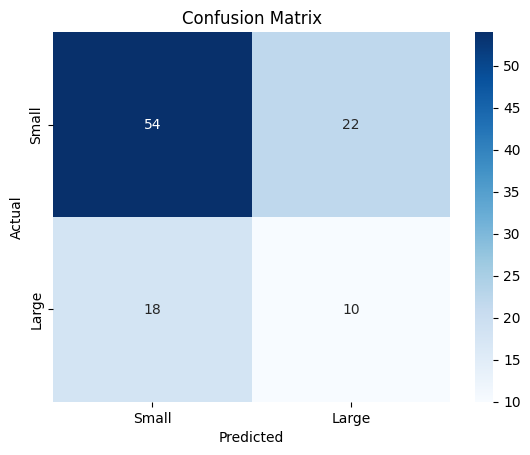

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the data
# Load the CSV file (replace 'forestfires.csv' with the path to your file)
data = pd.read_csv('forestfires.csv')

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Drop 'area' column to avoid data leakage and 'month', 'day' to avoid string conversion errors
data = data.drop(['area', 'month', 'day'], axis=1)

# Encode target variable (size_category: Small=0, Large=1)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# Define features (X) and target (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

# Identify numerical columns for scaling (exclude one-hot encoded columns)
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

# Scale numerical features
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the SVM model
svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')  # Use 'balanced' for class imbalance
svm.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = svm.predict(X_test)

# Step 5: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Small', 'Large'], yticklabels=['Small', 'Large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load data
data = pd.read_csv('forestfires.csv')

# Check missing values and class distribution
print("Missing values:\n", data.isnull().sum())
print("\nValue Counts of Target (size_category):\n", data['size_category'].value_counts())

# Drop 'area', 'month', and 'day' to avoid leakage and string issues
data = data.drop(['area', 'month', 'day'], axis=1)

# Encode target variable (small=0, large=1)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# Define features (X) and target (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

# Scale numerical features only
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Train rows: {X_train.shape[0]}, Test rows: {X_test.shape[0]}")

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_scaled, y_train = smote.fit_resample(X_train, y_train)

# Train SVM with default parameters
svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test)

# Evaluate default model
print("\nDefault SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nDefault SVM Classification Report:\n", classification_report(y_test, y_pred, target_names=['small', 'large']))

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid_svm.best_params_)

# Evaluate tuned model
best_model = grid_svm.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned SVM Classification Report:\n", classification_report(y_test, y_pred_best, target_names=['small', 'large']))

# Confusion matrix for tuned model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['small', 'large'], yticklabels=['small', 'large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned SVM)')
plt.show()

ModuleNotFoundError: No module named 'imblearn'

In [5]:
# --- Forest Fire Size Category SVM Classification: Ultimate Best-Practice Pipeline ---

# 1. IMPORTS (for Data, ML, Plotting)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. LOAD DATA
file_path = r'C:\Users\6063454\Desktop\VPW\Top Mentor Projects\12. Support Vector Machines 2\12. Support Vector Machines\forestfires.csv'
data = pd.read_csv(file_path)

# 3. SAFETY CHECKS: NA, PRINT OVERVIEW
print("Missing values:\n", data.isnull().sum())
print("\nFirst 5 rows:\n", data.head())
print("\nColumns:", data.columns.tolist())

# 4. DROP 'area' COLUMN (to avoid leakage!)
if 'area' in data.columns:
    data = data.drop('area', axis=1)

# 5. ENSURE TARGET IS BINARY NUMERIC: 0/1 (small=0, large=1)
if data['size_category'].dtype == 'O':
    data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# 6. IDENTIFY FEATURE GROUPS
# List of possible numerical columns—check if actually present
numerical_cols = [col for col in ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'] if col in data.columns]
target_col = 'size_category'

# Assume one-hot columns are present for day/month (as in your file)
# If not, add: data = pd.get_dummies(data, columns=['month','day'], drop_first=True)

# 7. SPLIT DATA to X (features) and y (target)
X = data.drop(target_col, axis=1)
y = data[target_col]

# 8. TRAIN-TEST SPLIT (stratified for balanced targets)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# 9. SCALE ONLY NUMERICAL COLUMNS (dummies not scaled)
scaler = StandardScaler()
# Fit on train, transform train/test with the same scaler.
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

# 10. BUILD INITIAL SVM MODEL (RBF kernel, class_weight for imbalance)
svm = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test_scaled)

# 11. EVALUATE INITIAL MODEL
print("\nInitial SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['small','large']))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['small', 'large'], yticklabels=['small', 'large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Initial)')
plt.show()

# 12. GRID SEARCH (HYPERPARAMETER TUNING)
print("\nRunning Grid Search for Best SVM Parameters...")
param_grid = {
    'C': [0.1, 1, 5, 10],
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']  # 'linear' can also be tried, but 'rbf' is best for this data
}
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_svm = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

# 13. FINAL EVALUATION WITH TUNED SVM
y_pred_best = best_svm.predict(X_test_scaled)
print("\nFinal (Tuned) SVM Results:")
print(f"Final Accuracy: {accuracy_score(y_test, y_pred_best)*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best, target_names=['small','large']))
cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens', xticklabels=['small', 'large'], yticklabels=['small', 'large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM (Tuned) Confusion Matrix')
plt.show()

# 14. TIPS FOR IMPROVEMENT
print("""
TIPS:
- If 'large' fires are very rare, consider 'SMOTE' or other resampling for more recall.
- Further hyperparameter grid or random search can help.
- Try additional ML models (RandomForest, XGBoost, etc.) for comparison.
- Examine feature importances or model explainability with SHAP/LIME for insight.
- All code blocks are prepared for copy-paste, ready for beginners and advanced!
""")


Missing values:
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

First 5 rows:
   month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  ...  monthfeb  \
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0  ...         0   
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0  ...         0   
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0  ...         0   
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.

ValueError: could not convert string to float: 'sep'

In [6]:
!pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


In [7]:
import imblearn
print(imblearn.__version__)

0.14.0


SMOTE is available.
Missing values:
 month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

Value Counts of Target (size_category):
 size_category
small    378
large    139
Name: count, dtype: int64
Train rows: 413, Test rows: 104
Applied SMOTE to balance classes.

Default SVM Accuracy: 0.5865384615384616

Default SVM Classification Report:
               precision    recall  f1-score   support

       small       0.71      0.74      0.72        76

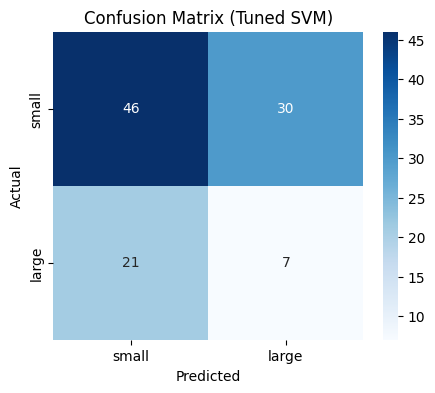

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check for imblearn availability
try:
    from imblearn.over_sampling import SMOTE
    smote_available = True
    print("SMOTE is available.")
except ImportError:
    smote_available = False
    print("SMOTE (imblearn) is not installed. Proceeding without SMOTE. Install with: pip install imbalanced-learn")

# Load data
data = pd.read_csv('forestfires.csv')

# Check missing values and class distribution
print("Missing values:\n", data.isnull().sum())
print("\nValue Counts of Target (size_category):\n", data['size_category'].value_counts())

# Drop 'area', 'month', and 'day' to avoid leakage and string issues
data = data.drop(['area', 'month', 'day'], axis=1)

# Encode target variable (small=0, large=1)
data['size_category'] = data['size_category'].map({'small': 0, 'large': 1})

# Define features (X) and target (y)
X = data.drop('size_category', axis=1)
y = data['size_category']

# Scale numerical features only
numerical_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print(f"Train rows: {X_train.shape[0]}, Test rows: {X_test.shape[0]}")

# Apply SMOTE if available, else rely on class_weight
if smote_available:
    smote = SMOTE(random_state=42)
    X_train_scaled, y_train = smote.fit_resample(X_train, y_train)
    print("Applied SMOTE to balance classes.")
else:
    X_train_scaled = X_train
    print("SMOTE skipped. Using class_weight='balanced' to handle imbalance.")

# Train SVM with default parameters
svm = SVC(kernel='rbf', random_state=42, class_weight='balanced')
svm.fit(X_train_scaled, y_train)
y_pred = svm.predict(X_test)

# Evaluate default model
print("\nDefault SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nDefault SVM Classification Report:\n", classification_report(y_test, y_pred, target_names=['small', 'large']))

# Hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['rbf', 'linear']
}
grid_svm = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_svm.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid_svm.best_params_)

# Evaluate tuned model
best_model = grid_svm.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nTuned SVM Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nTuned SVM Classification Report:\n", classification_report(y_test, y_pred_best, target_names=['small', 'large']))

# Confusion matrix for tuned model
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['small', 'large'], yticklabels=['small', 'large'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Tuned SVM)')
plt.show()

In [9]:
pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
